In [1]:
import ipywidgets as widgets
import os, sys

sys.path.append(os.path.dirname(os.getcwd()))
from src.plotting import plot_trend
from preprocess import run_prepare

from train import train_model
from run import run_inference

from hydra import initialize, compose
# from omegaconf import OmegaConf

import warnings
warnings.filterwarnings("ignore")

In [2]:
with initialize(version_base=None, config_path= "../configs"):
    cfg = compose(config_name= "main_config.yaml")

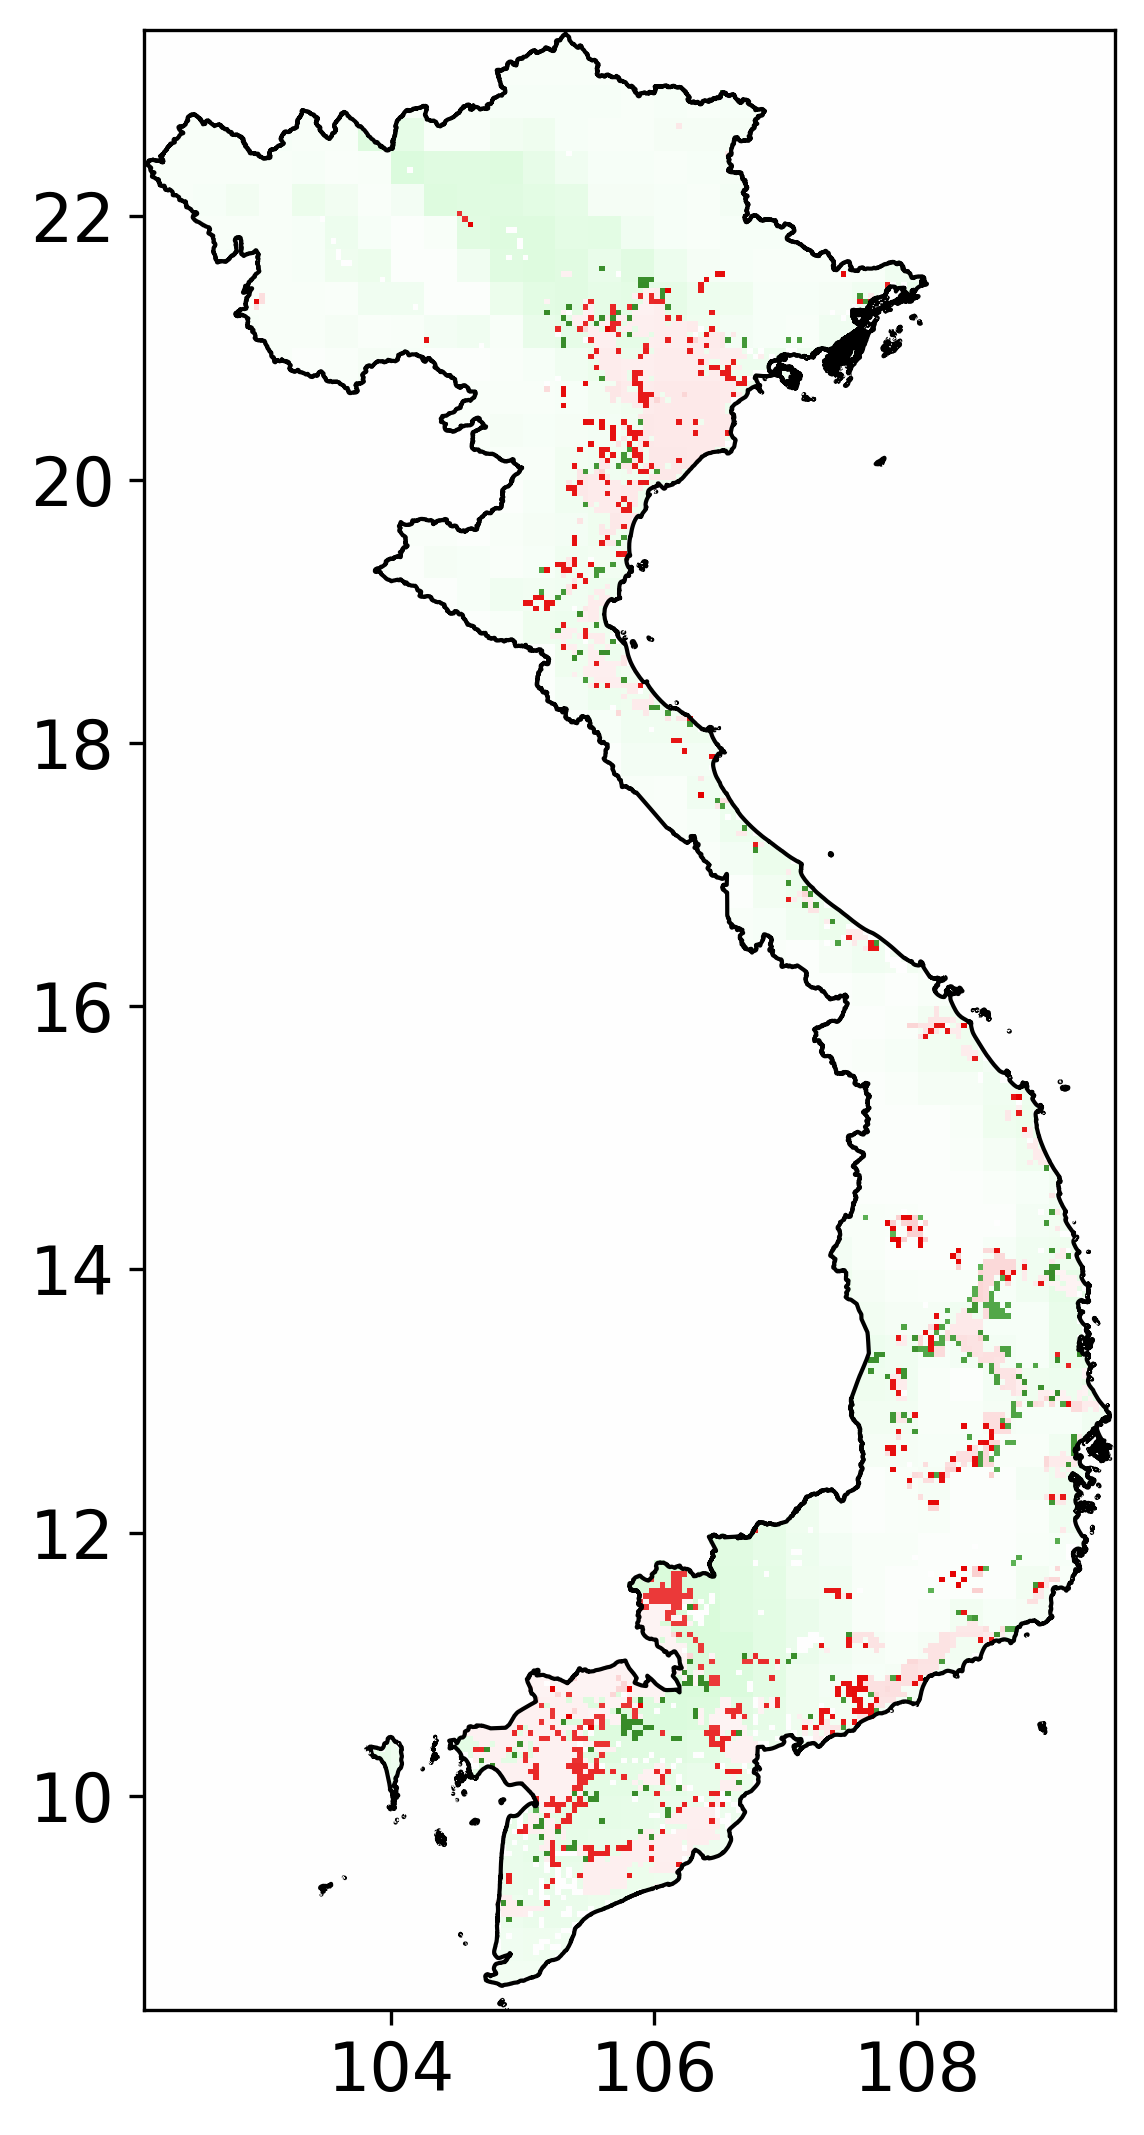

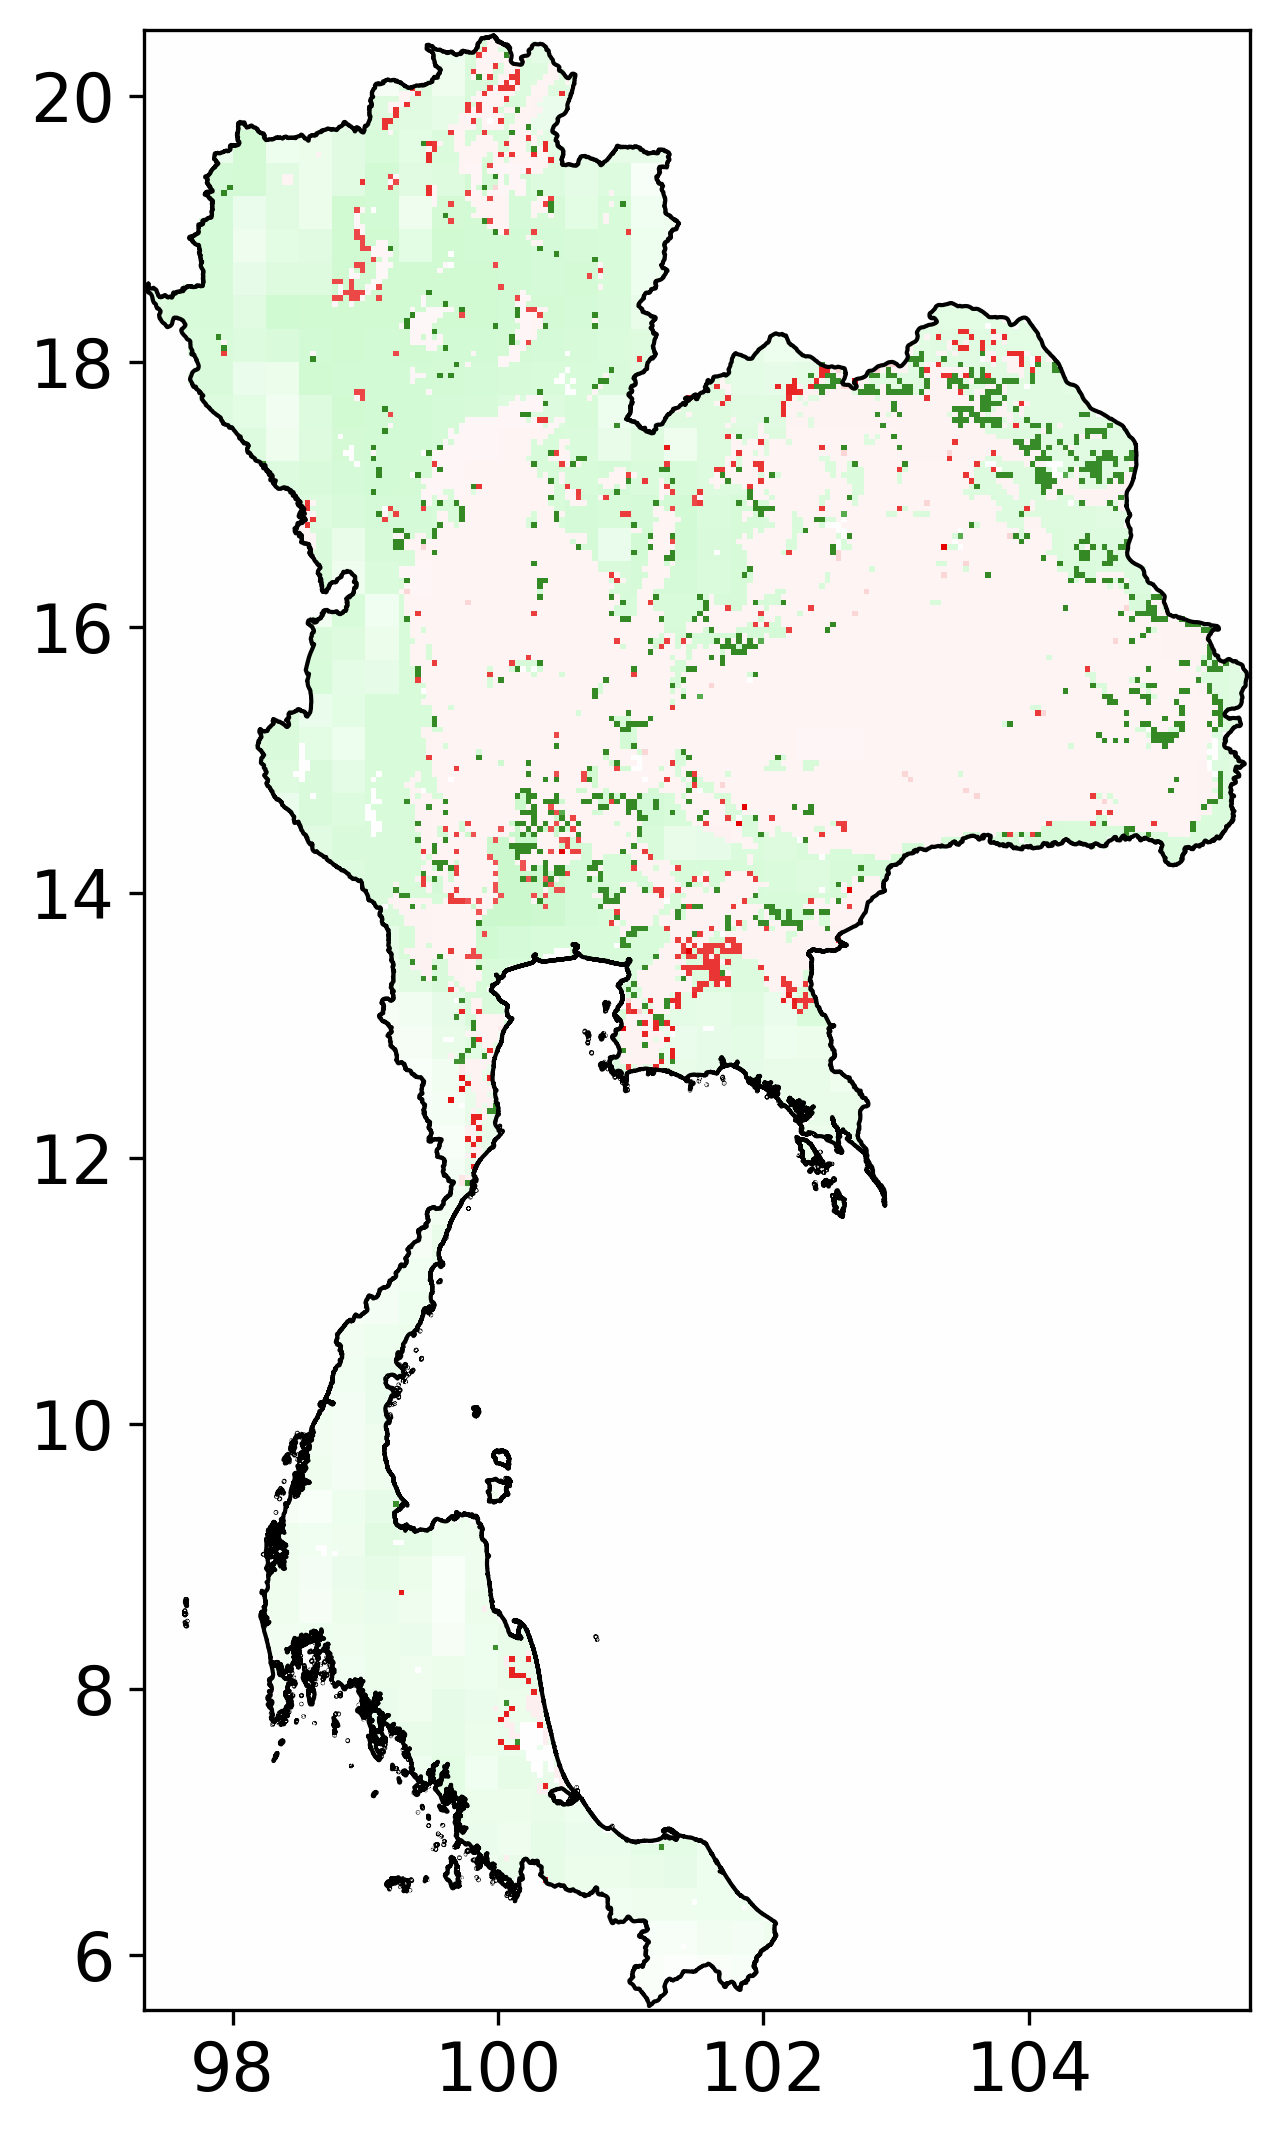

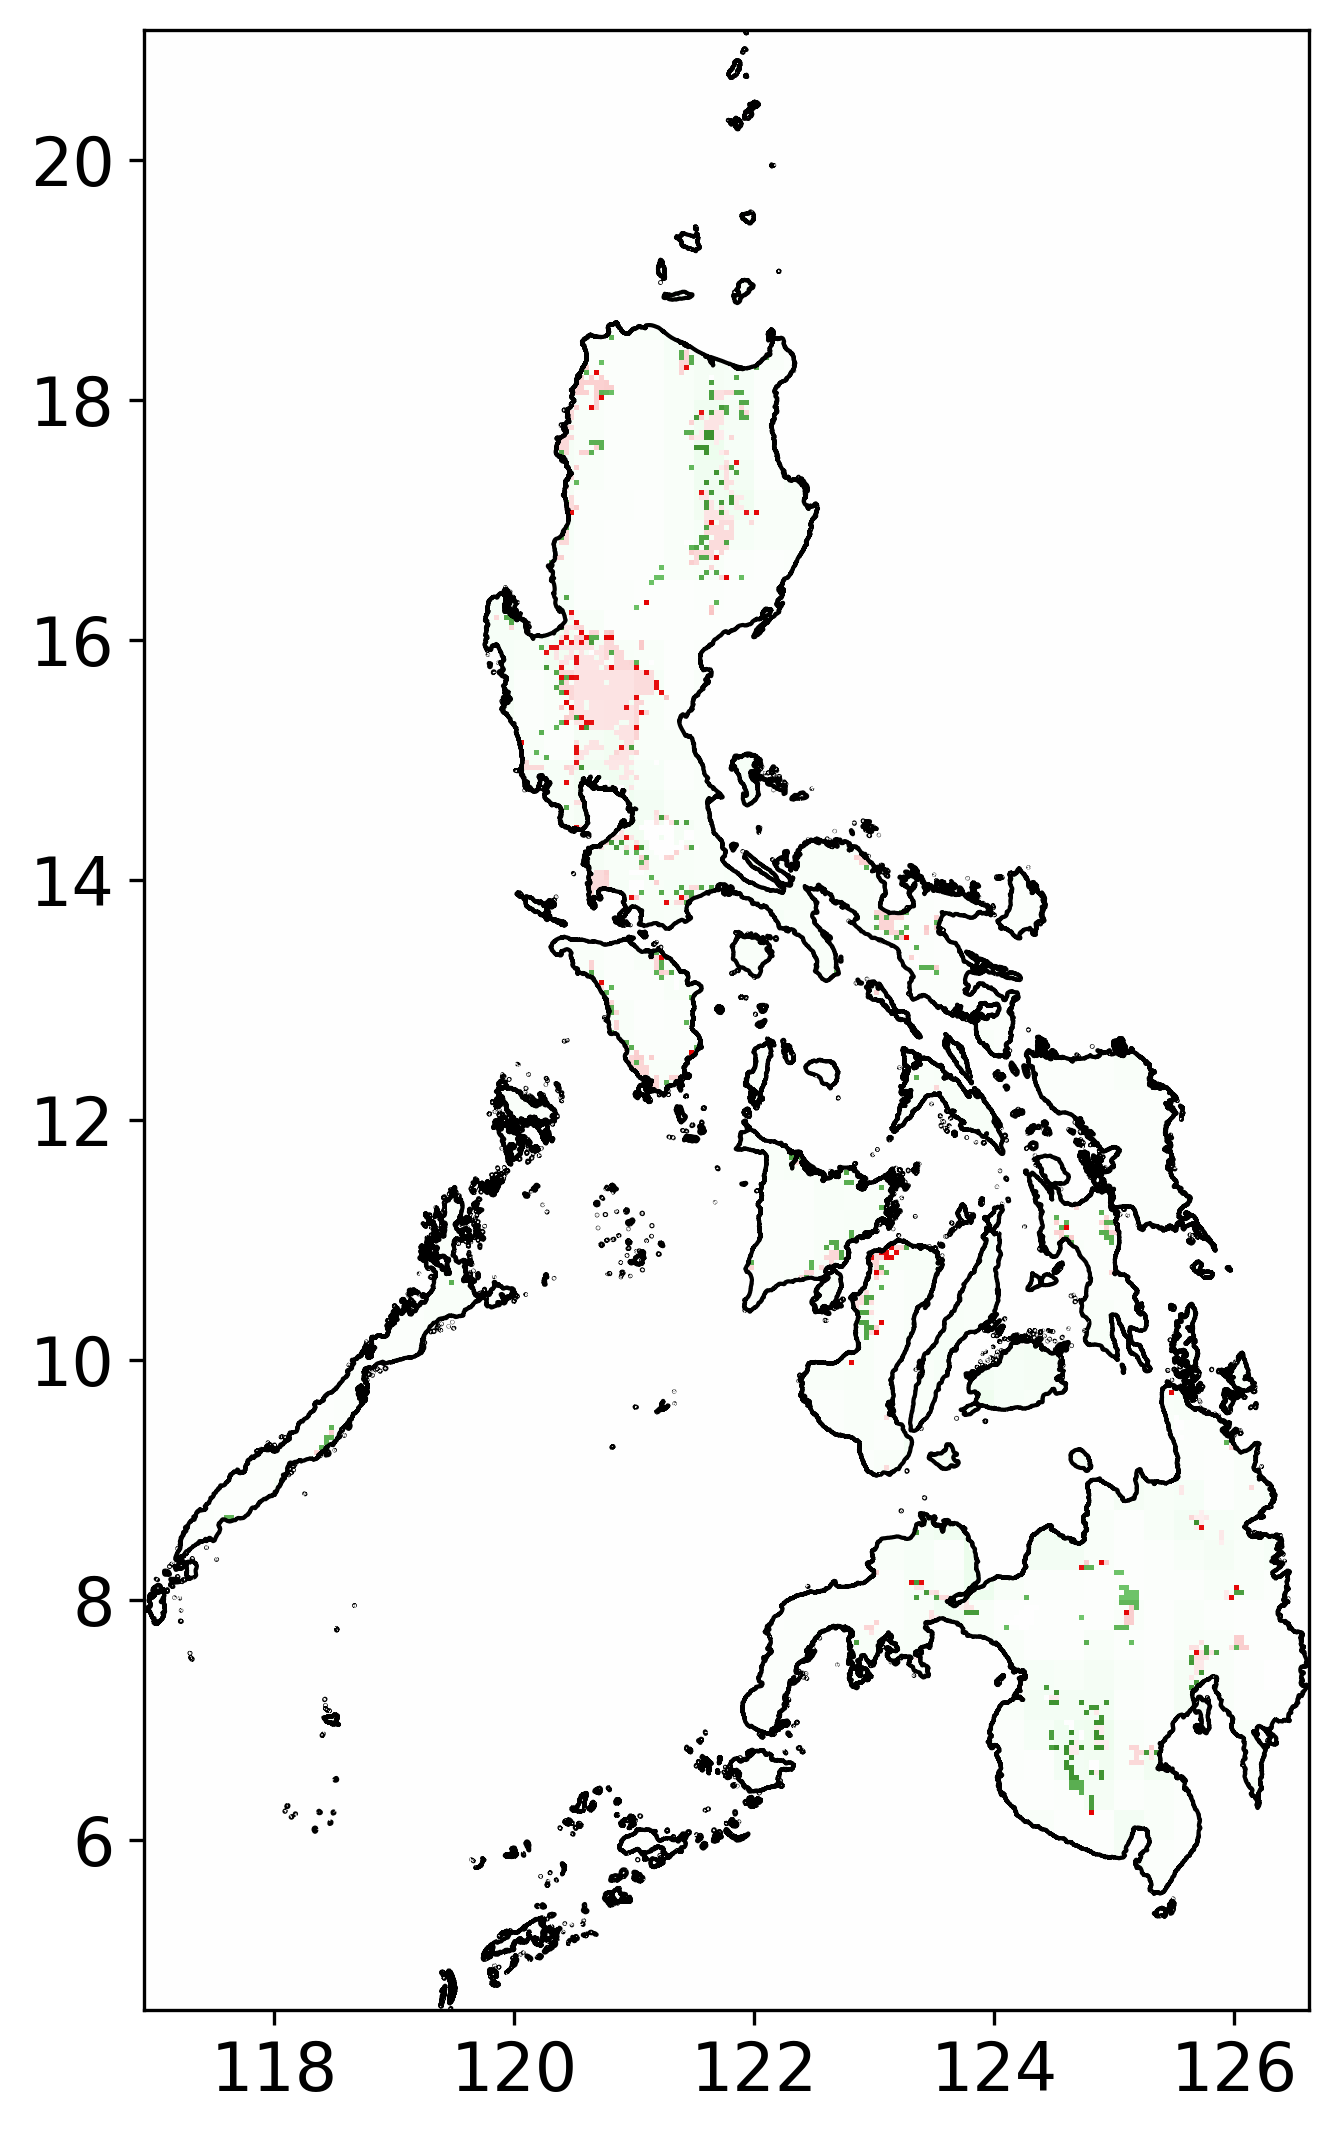

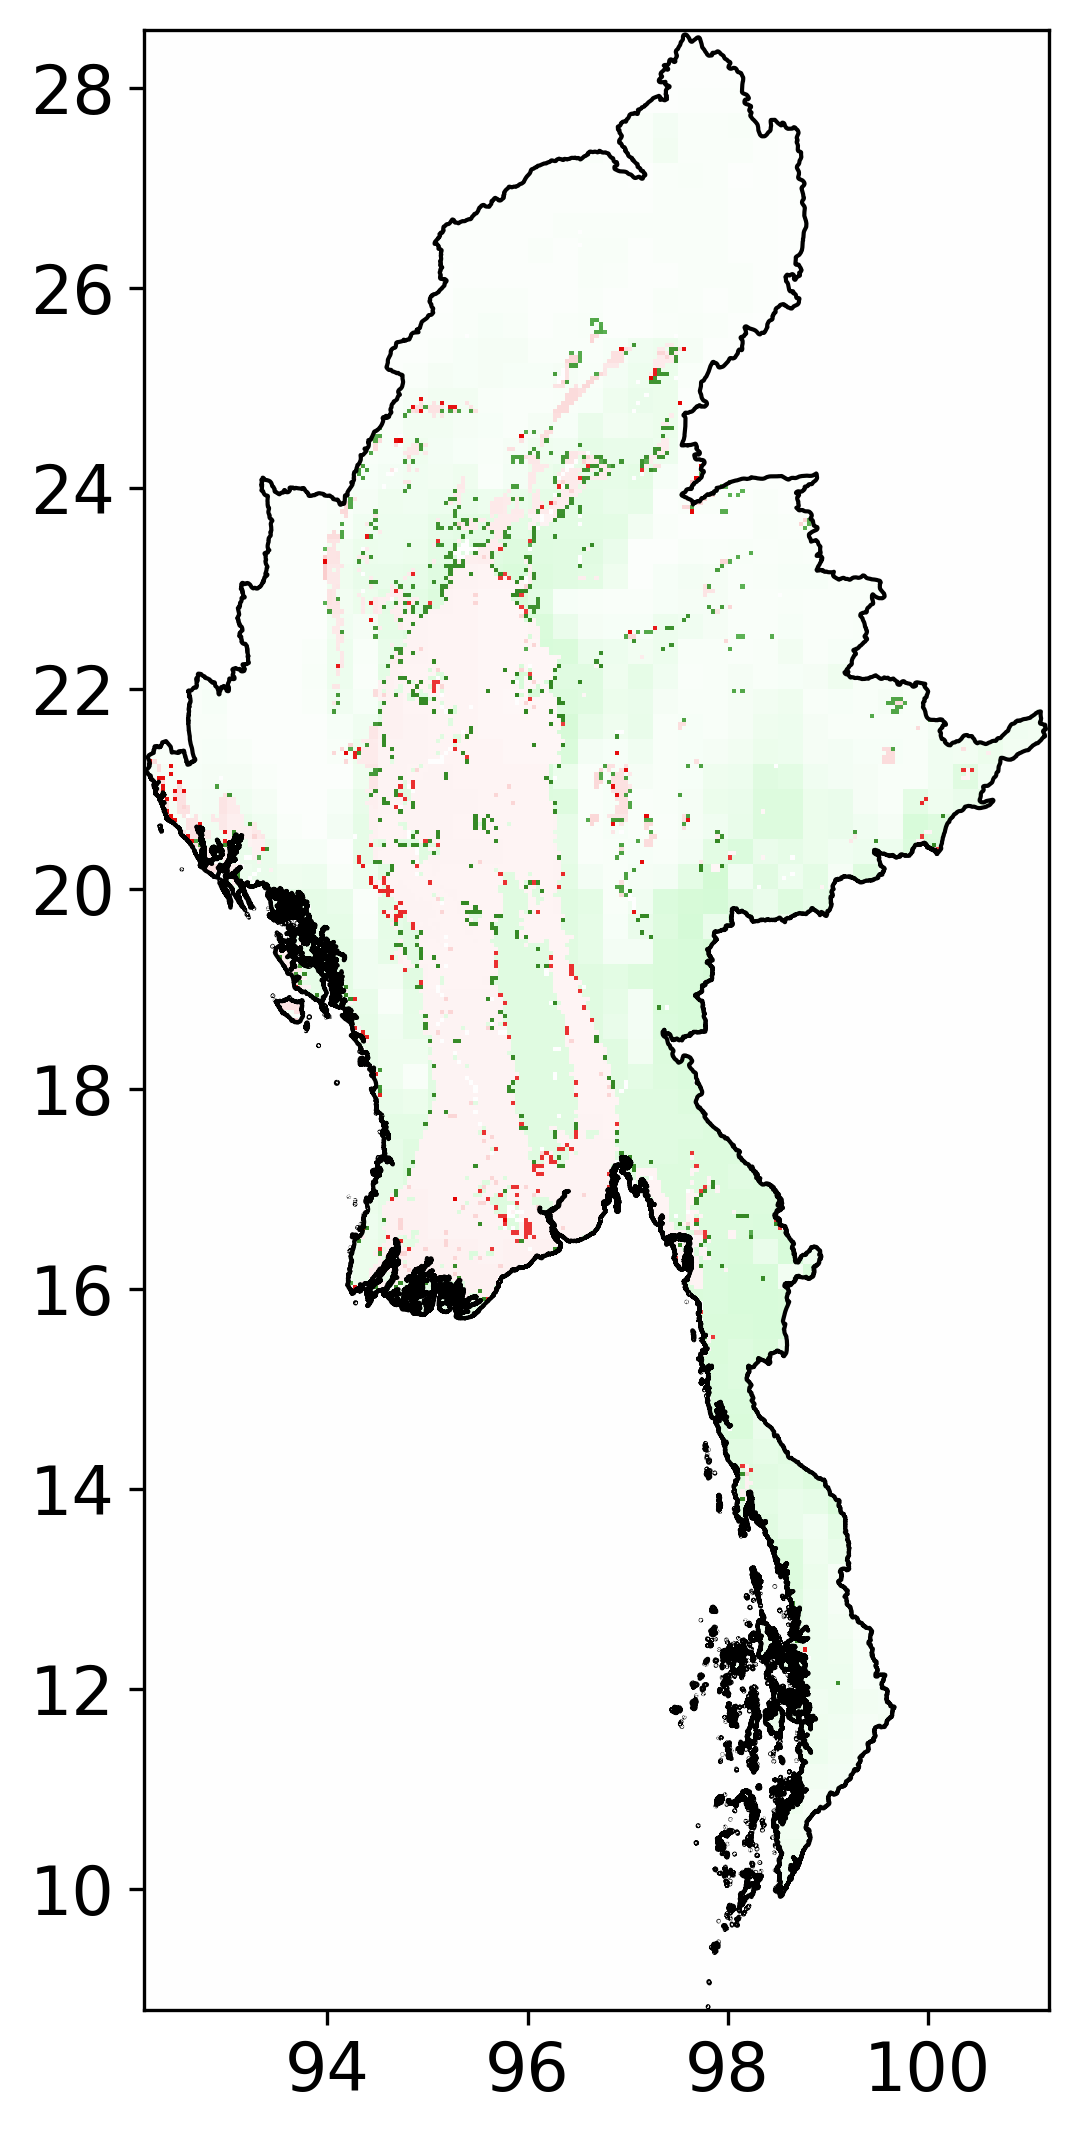

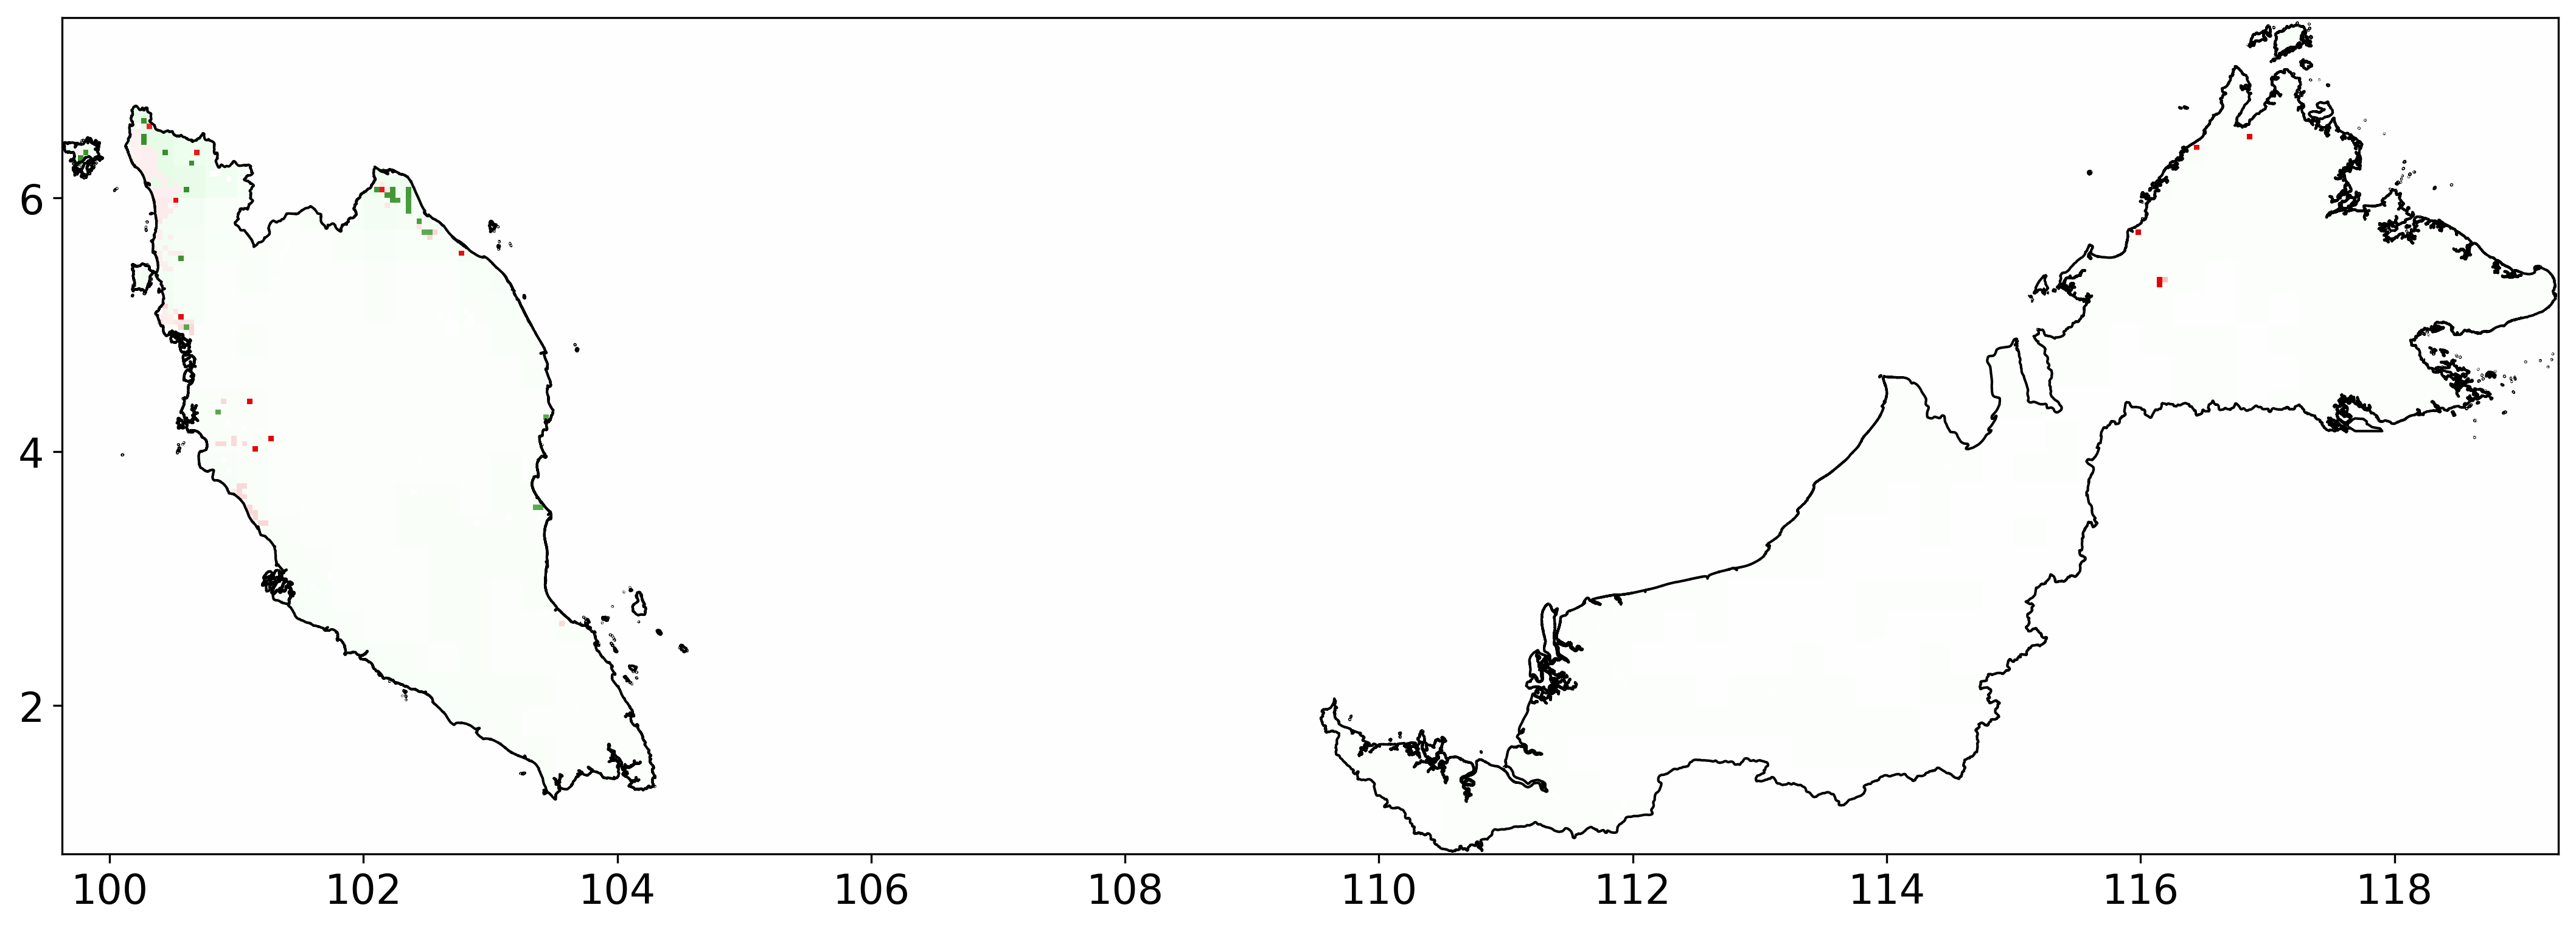

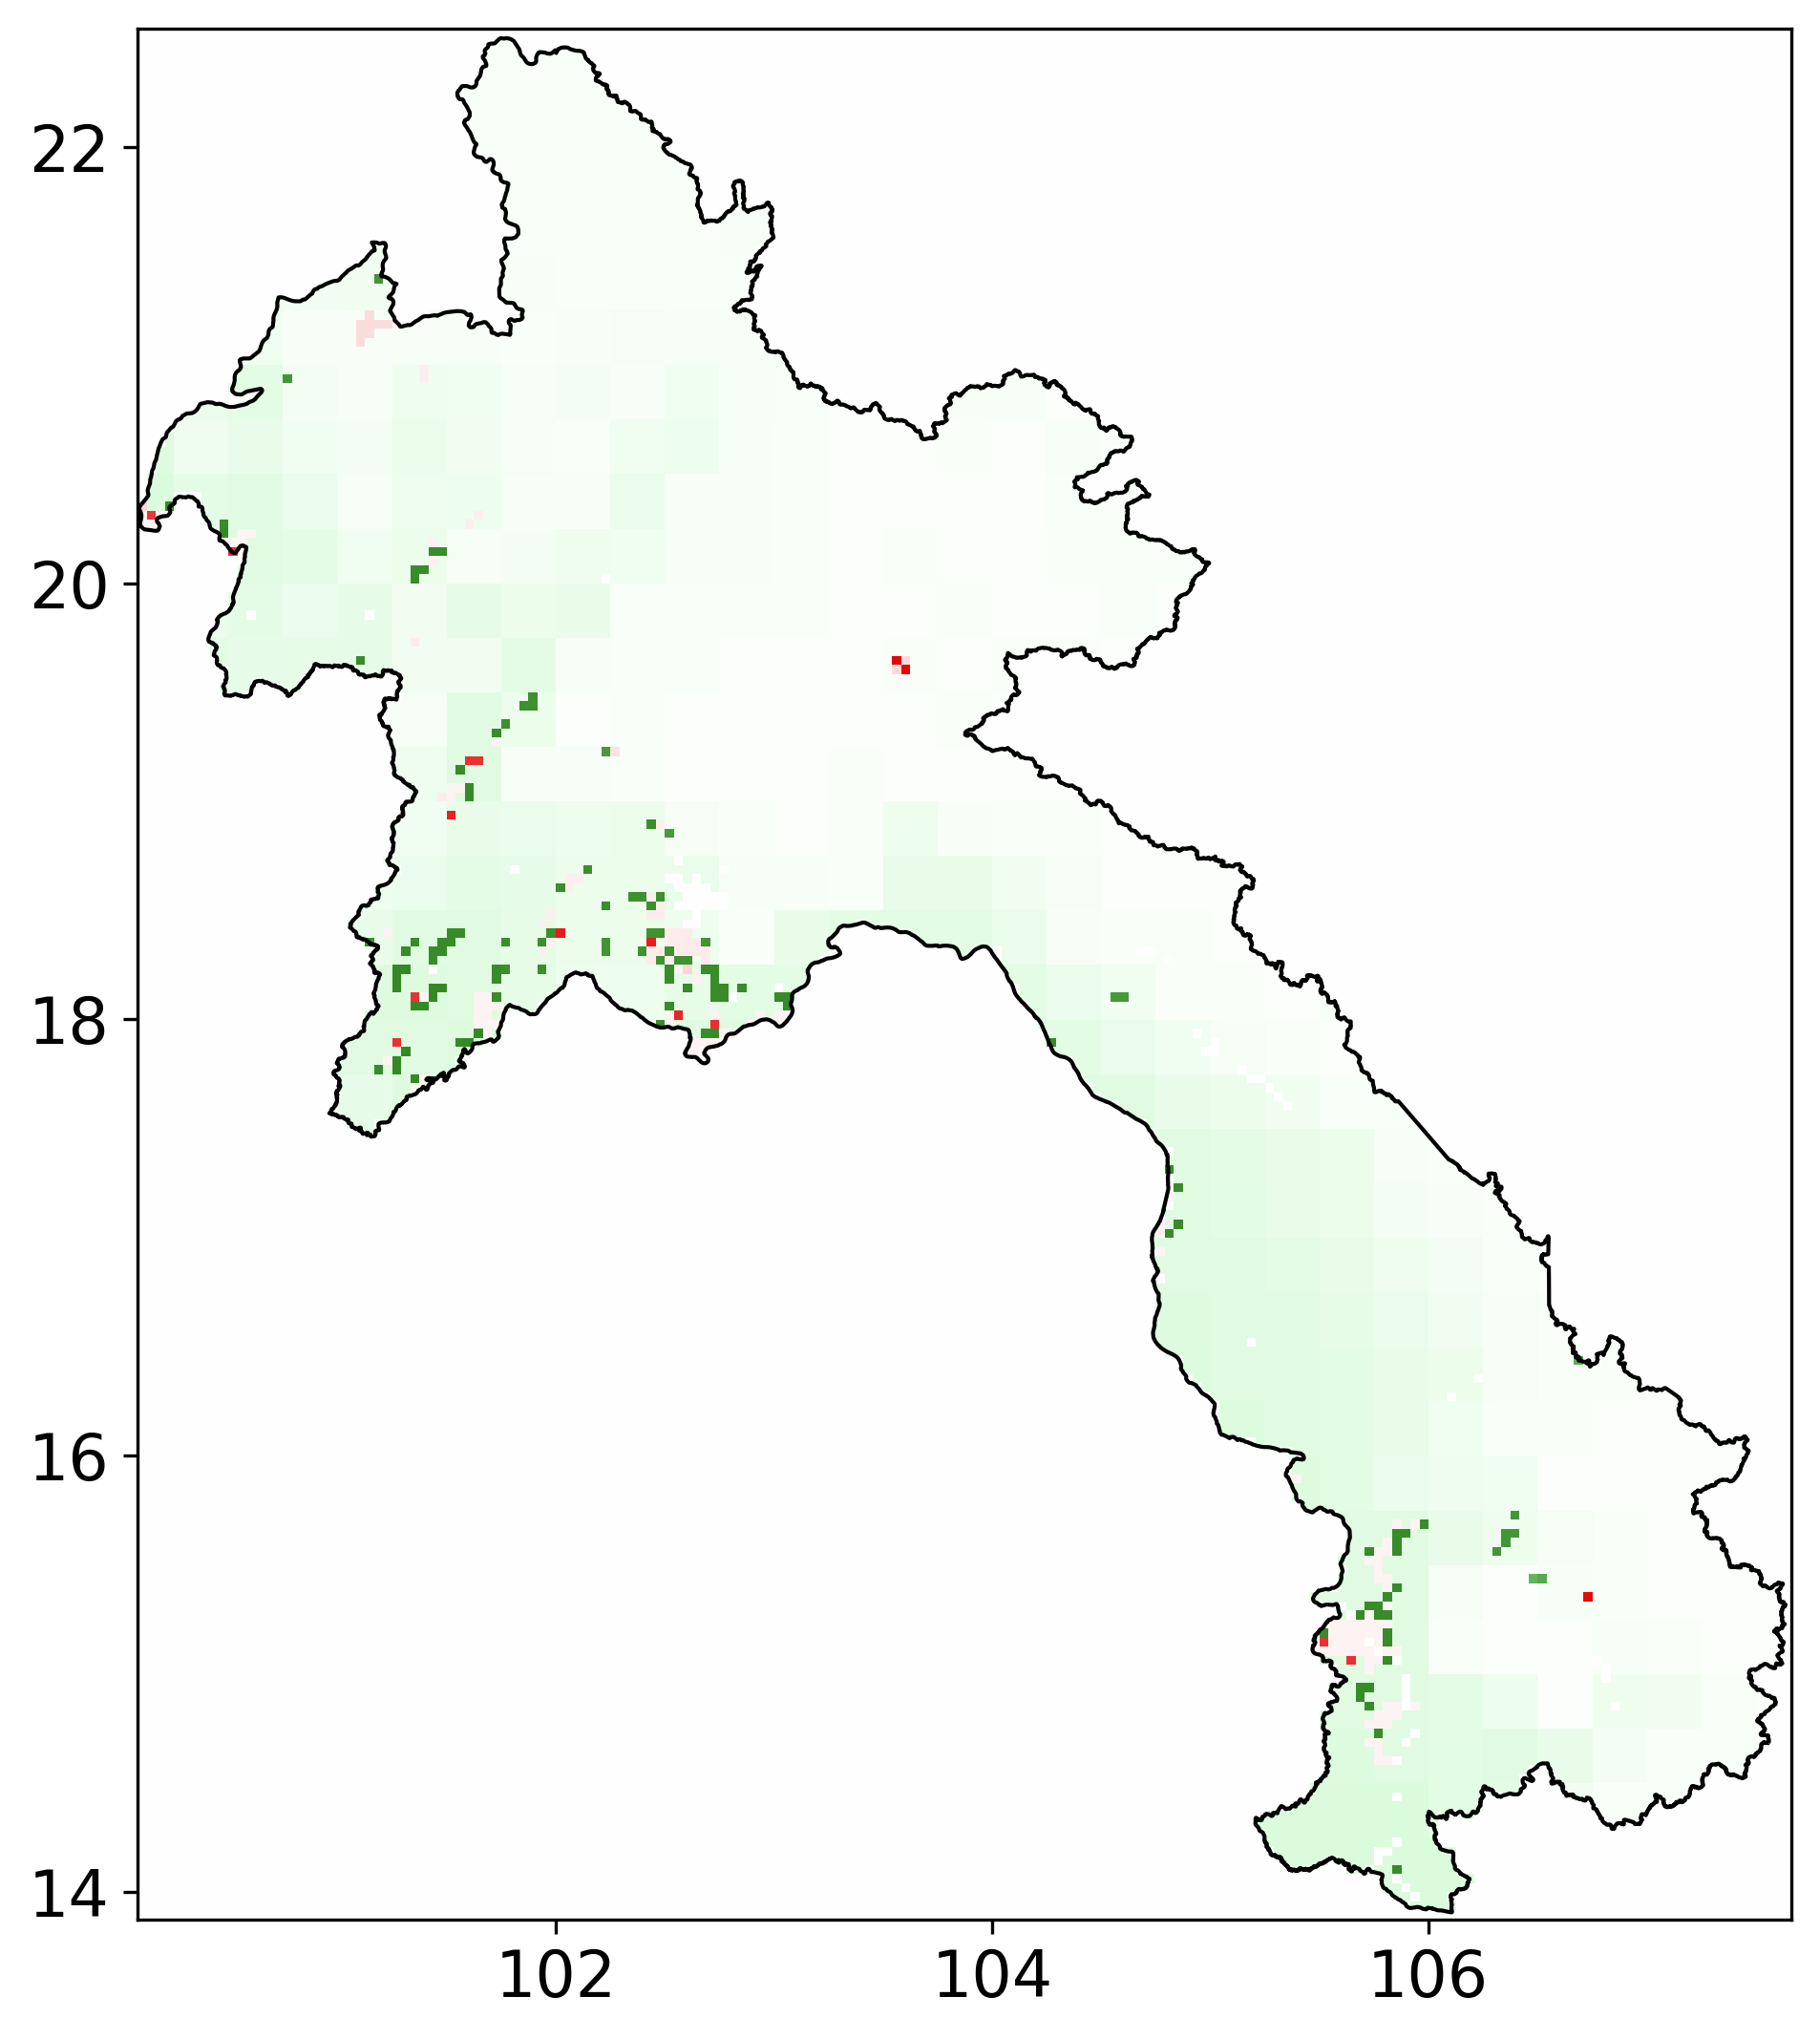

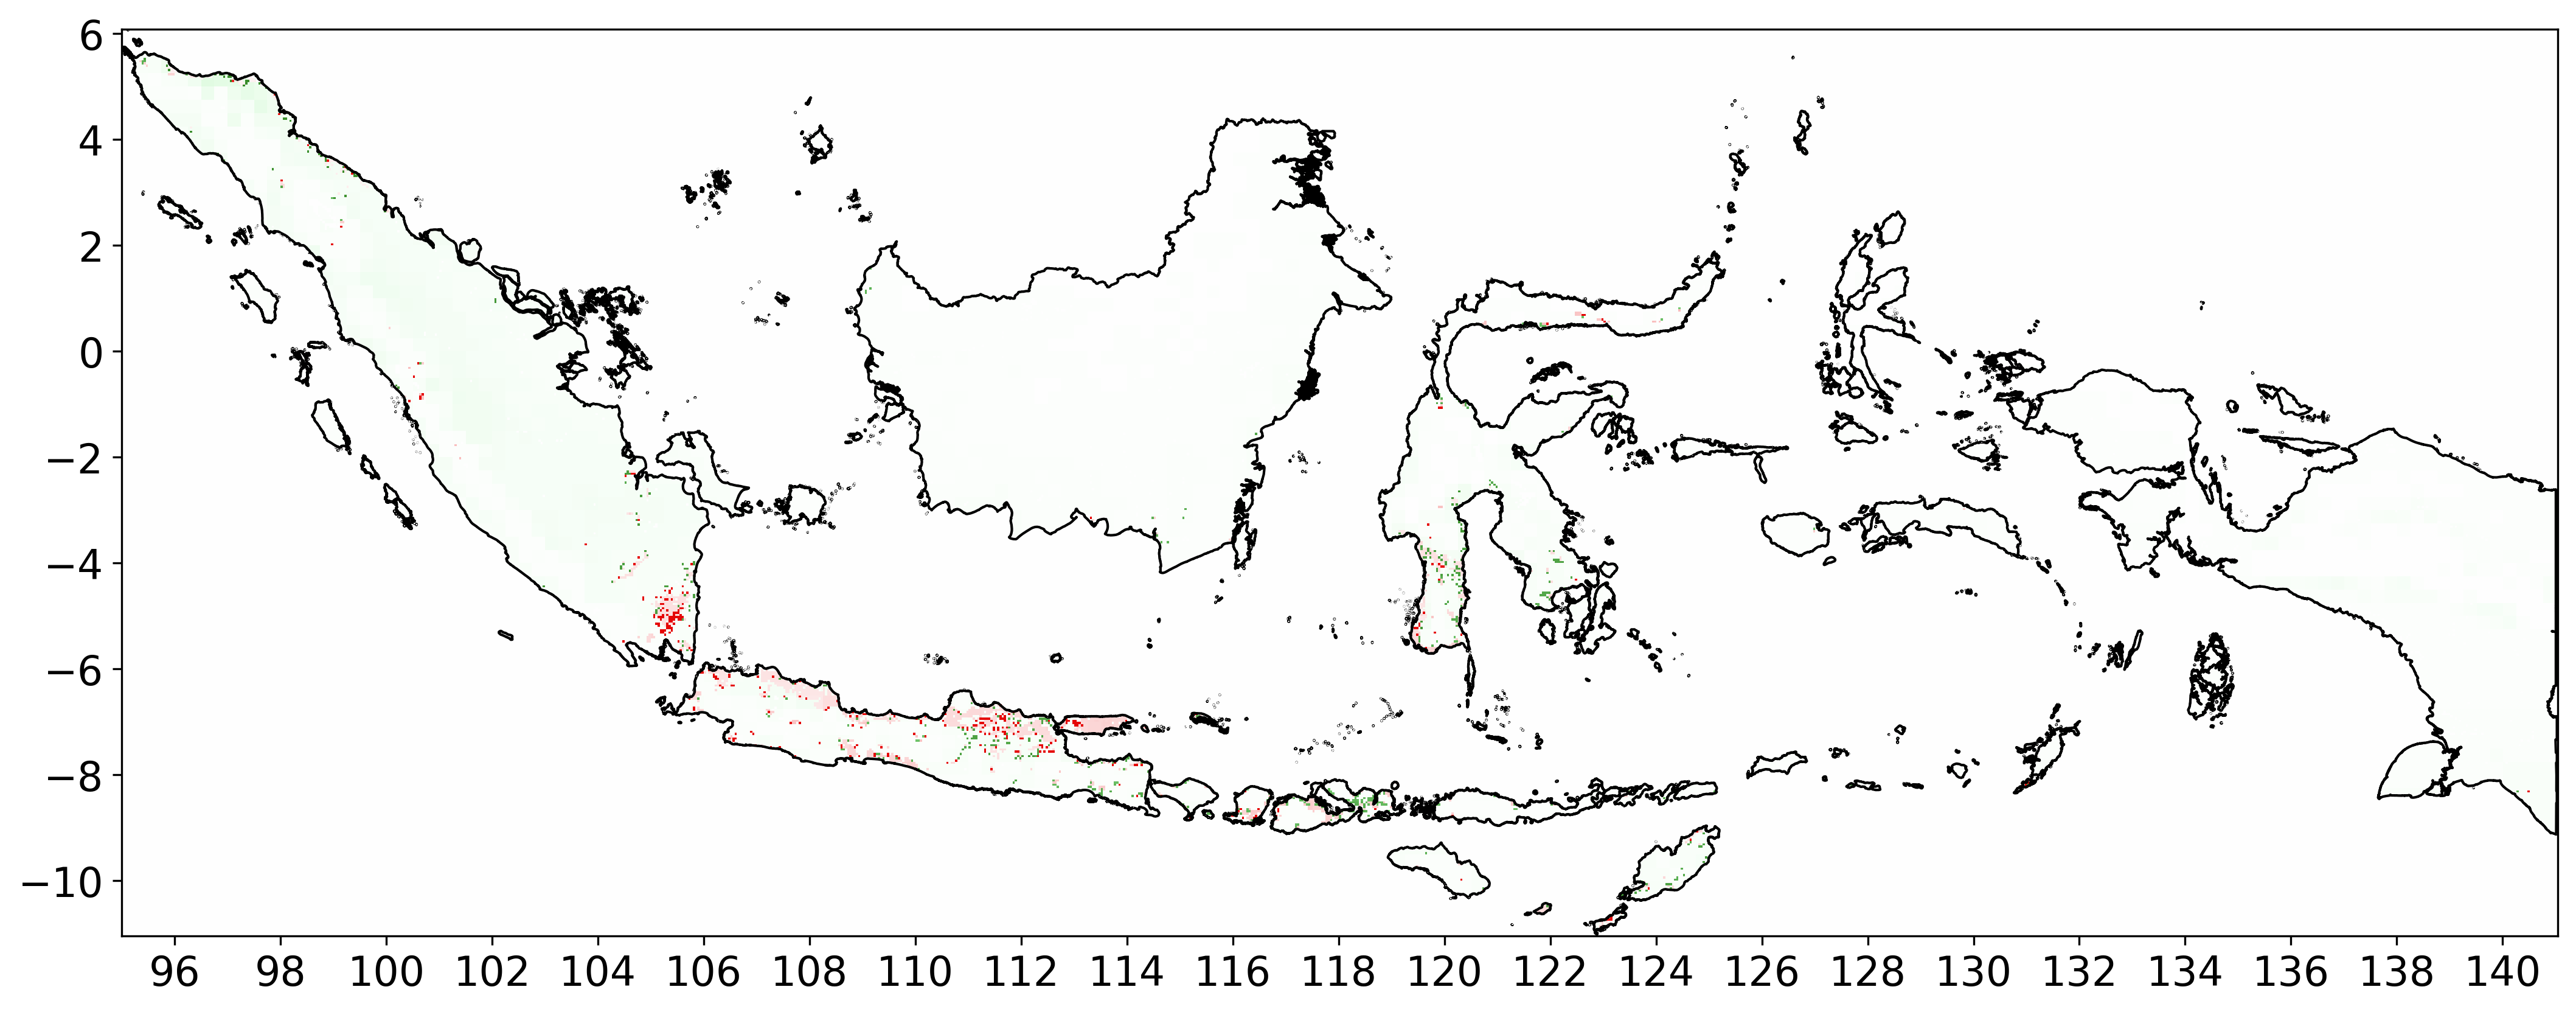

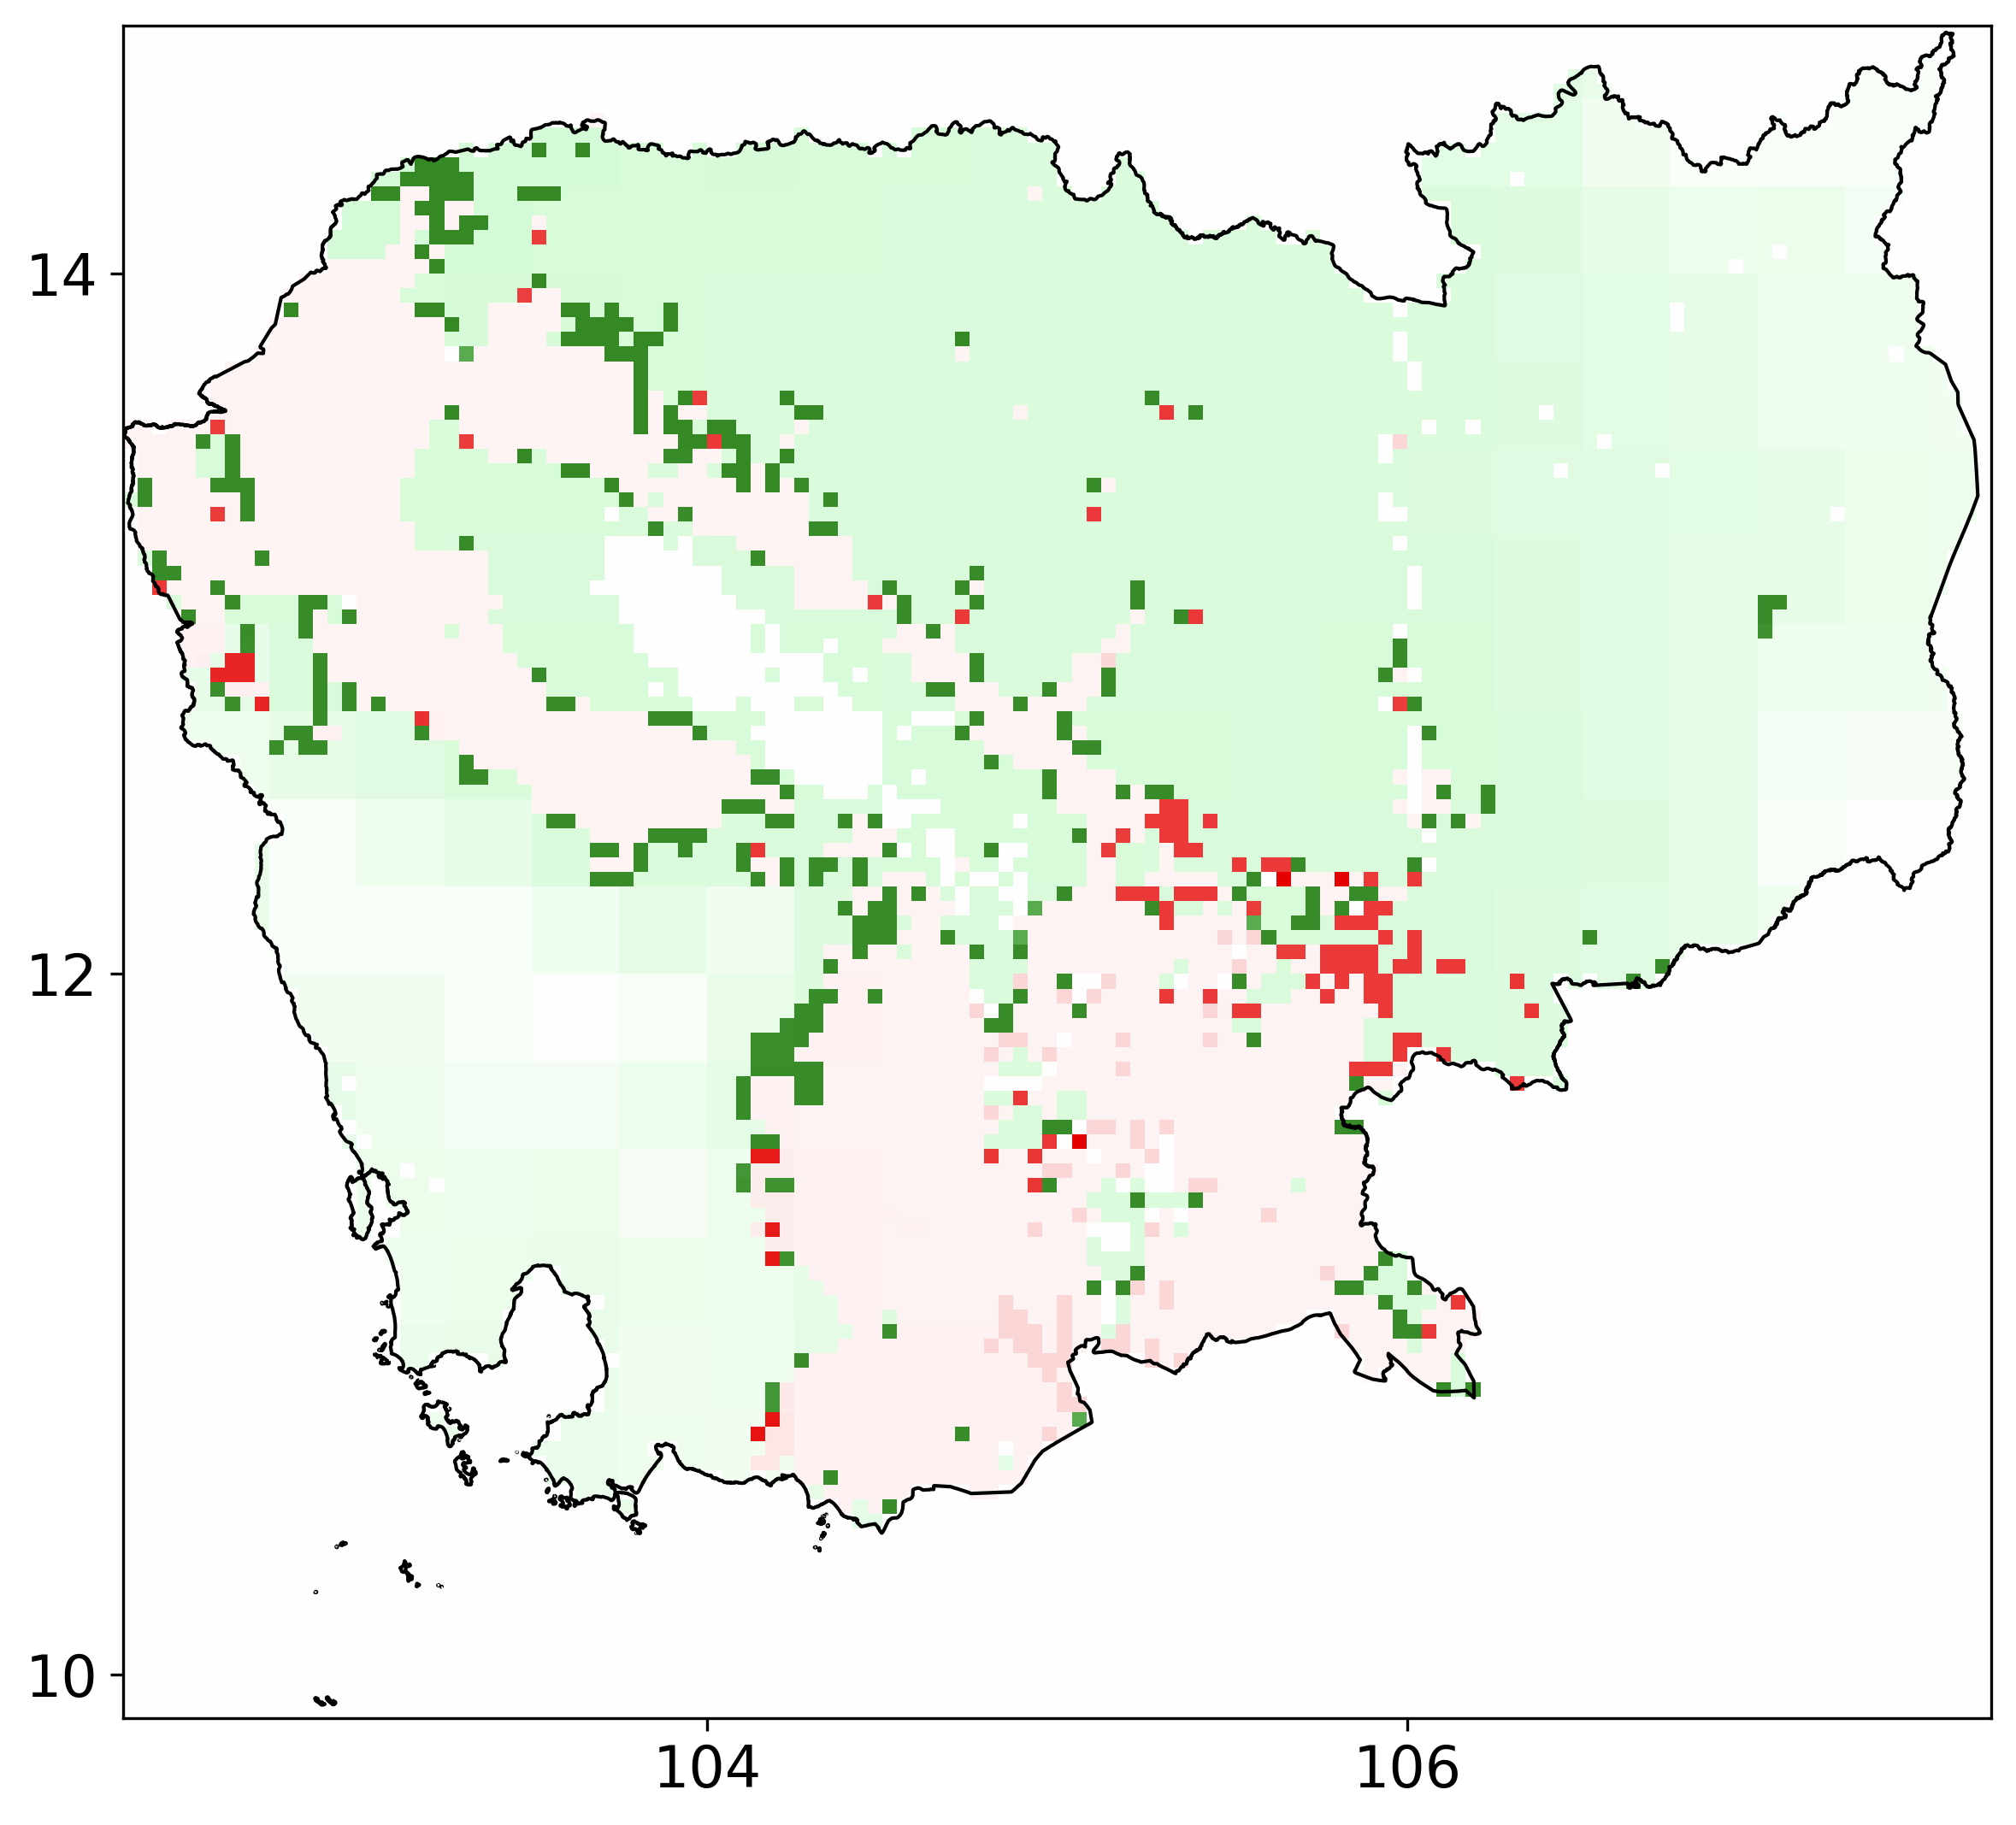

In [3]:
country_dropdown = widgets.Dropdown(
    options=cfg.eval.country_names,
    description='Country:',
)

year_dropdown = widgets.Dropdown(
    options=[2028],
    description='Year:',
)

def plot_handler(b):
    model = cfg.model_name
    countries = [country_dropdown.value]
    country_index = [cfg.eval.country_names.index(chosen) for chosen in [country_dropdown.value]]
    prefixes = [cfg.eval.prefixes[country_index[0]]]
    
    year = year_dropdown.value
    if os.path.exists(cfg.process.path_raw) & os.path.exists(cfg.process.path_pics):
        plot_trend(model, prefixes, countries, year, cfg.process.path_raw, cfg.process.path_pics, plot=True)
    else:
        print("Path not found")


def preprocess_handler(b):
    run_prepare(cfg)

def train_handler(b):
    train_model(cfg)

def run_handler(b):
    run_inference(cfg)
    
button_process = widgets.Button(description="Preprocess Data")
button_process.on_click(preprocess_handler)

button_train = widgets.Button(description="Train")
button_train.on_click(train_handler)

button_run = widgets.Button(description="Run inference")
button_run.on_click(run_handler)

uploader = widgets.FileUpload(
    accept='.yaml',  # Accepted file extension
    multiple=False  # True to accept multiple files upload else False
)

button_plot = widgets.Button(description="Plot Data")
button_plot.on_click(plot_handler)

box_layout = widgets.Layout(display='flex', flex_flow='column', align_items='center')

vbox = widgets.VBox(
    [
        widgets.Label("Upload config file"),
        uploader,
        
        widgets.Label("Preprocess raw data"),
        button_process,
        
        widgets.Label("Train model"),
        button_train,
        
        widgets.Label("Run model"),
        button_run,
        
        widgets.Label("Select country for analysis"),
        country_dropdown,
        year_dropdown,
        button_plot,
    ],
    layout=box_layout,
)

# Display the UI components
display(vbox)